In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as pt
from lime.lime_tabular import LimeTabularExplainer


In [2]:
data=pd.read_csv('customer.csv')
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
data.shape

(7043, 21)

In [4]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [13]:
num_col=data.select_dtypes(include=['float64', 'int64']).columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [15]:
imputer=SimpleImputer(strategy='mean')
data[num_col]=imputer.fit_transform(data[num_col])

In [14]:
category=data.select_dtypes(include=['object']).columns
category


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [16]:
imputer=SimpleImputer(strategy='most_frequent')
data[category]=imputer.fit_transform(data[category])

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
label={}
for col in category:
    print(col)
    le=LabelEncoder()
    data[col]= le.fit_transform(data[col].astype(str))
    label[col]=le


customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [24]:
scaler=StandardScaler()
data[num_col]=scaler.fit_transform(data[num_col])

In [25]:
data[num_col]

,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365
...,...,...,...
7038,-0.439916,-0.340876,0.665992
7039,-0.439916,1.613701,1.277533
7040,-0.439916,-0.870241,-1.168632
7041,2.273159,-1.155283,0.320338


In [26]:
data.describe([0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000
mean,3521.000000,0.504756,-4.842546e-17,0.483033,0.299588,-2.421273e-17,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,-6.406285e-17,3257.794122,0.265370
std,2033.283305,0.500013,1.000071e+00,0.499748,0.458110,1.000071e+00,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,1.000071e+00,1888.693496,0.441561
min,0.000000,0.000000,-4.399165e-01,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.545860e+00,0.000000,0.000000
5%,352.100000,0.000000,-4.399165e-01,0.000000,0.000000,-1.277445e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.499330e+00,327.100000,0.000000
25%,1760.500000,0.000000,-4.399165e-01,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.725399e-01,1609.000000,0.000000
50%,3521.000000,1.000000,-4.399165e-01,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.857327e-01,3249.000000,0.000000
75%,5281.500000,1.000000,-4.399165e-01,1.000000,1.000000,9.214551e-01,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.338335e-01,4901.500000,1.000000
90%,6337.800000,1.000000,2.273159e+00,1.000000,1.000000,1.491540e+00,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.257592e+00,5876.800000,1.000000
95%,6689.900000,1.000000,2.273159e+00,1.000000,1.000000,1.613701e+00,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.417124e+00,6206.900000,1.000000


In [27]:
x=data.drop(columns=['Churn'])
y=data['Churn']

xtrain, xtest, ytrain, ytest =train_test_split(x,y, test_size=0.2, random_state=42)

In [31]:
model1=RandomForestClassifier(random_state=42)
model1.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [35]:
m1pred=model1.predict(xtest)
m1acc=accuracy_score(ytest, m1pred)
m1_roc_auc=roc_auc_score(ytest, model1.predict_proba(xtest)[:,1])

In [36]:
print("RandomForestClassifier result:")
print("Accuracy=", m1acc)
print("AUC score=", m1_roc_auc)
print(classification_report(ytest, m1pred))

RandomForestClassifier result:
Accuracy= 0.7955997161107168
AUC score= 0.8385714803275125
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [37]:
model2=LogisticRegression(random_state=42, max_iter=300)
model2.fit(xtrain, ytrain)

c:\Users\ST-LT-AI-LW283\miniconda3\envs\grapho\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300, random_state=42)

In [39]:
m2pred=model2.predict(xtest)
m2acc=accuracy_score(ytest, m2pred)
m2_roc_auc = roc_auc_score(ytest, model2.predict_proba(xtest)[:,1])

In [41]:
print("Logistic reegression result:")
print("Accuracy=", m2acc)
print("AUC score=", m2_roc_auc)
print(classification_report(ytest, m2pred))

Logistic reegression result:
Accuracy= 0.8183108587650816
AUC score= 0.8605302928359229
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [63]:
model1_grid={
    'n_estimators':[50,100,200],
    'max_depth': [None, 10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

In [64]:
print("grid search on model1")
model1=RandomForestClassifier(random_state=42)
model1_grid_search=GridSearchCV(estimator=model1, param_grid=model1_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=1, error_score='raise')
model1_grid_search.fit(xtrain, ytrain)

print("the best model:")
print(model1_grid_search.best_params_)
print("ROC Score:", model1_grid_search.best_score_)

grid search on model1
Fitting 5 folds for each of 108 candidates, totalling 540 fits
the best model:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
ROC Score: 0.8400128256607617


In [66]:
best_rf_model=model1_grid_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [75]:
explainer=LimeTabularExplainer(xtrain, mode='regression', training_labels=ytrain, feature_names=["feature" +str(i) for i in range (xtrain.shape[1])])
test_instance=xtest[0].reshape(1,-1)
explanation=explainer.explain_instance(test_instance[0], best_rf_model.predict)
explanation.show_in_notebook()

InvalidIndexError: (slice(None, None, None), 0)

In [70]:
feature_names=["feature" +str(i) for i in range (xtrain.shape[1])]

In [71]:
feature_names

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19']

In [76]:
xtrain.shape

(5634, 20)

In [77]:
ytrain.shape

(5634,)

### kemeans clustering

In [56]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as pt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [57]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

coverage= 5
coverage= 6
coverage= 7
coverage= 8
coverage= 9
coverage= 10
coverage= 11
coverage= 12
coverage= 13
coverage= 14
coverage= 15
coverage= 16
coverage= 17
coverage= 18
coverage= 19
coverage= 20
coverage= 21
coverage= 22
coverage= 23
coverage= 24
coverage= 25
coverage= 26
coverage= 27
coverage= 28
coverage= 29
coverage= 30
coverage= 31
coverage= 32
coverage= 33
coverage= 34
coverage= 35
coverage= 36
coverage= 37
coverage= 38
coverage= 39
coverage= 40
coverage= 41
coverage= 42
coverage= 43
coverage= 44
coverage= 45
coverage= 46
coverage= 47
coverage= 48
coverage= 49
coverage= 50
coverage= 51
coverage= 52
coverage= 53
coverage= 54
coverage= 55
coverage= 56
coverage= 57
coverage= 58
coverage= 59
coverage= 60
coverage= 61
coverage= 62
coverage= 63
coverage= 64
coverage= 65
coverage= 66
coverage= 67
coverage= 68
coverage= 69
coverage= 70
coverage= 71
coverage= 72
coverage= 73
coverage= 74
coverage= 75
coverage= 76
coverage= 77
coverage= 78
coverage= 79
coverage= 80
coverage= 81
cove

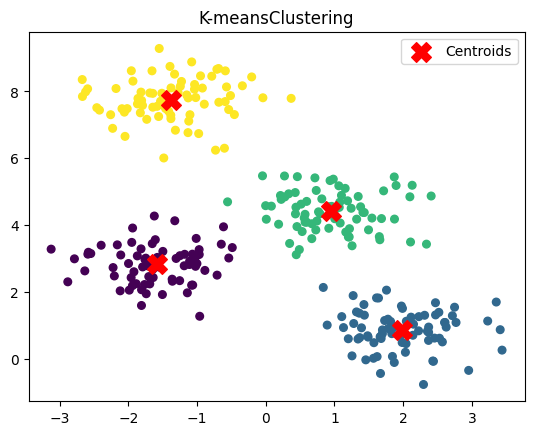

In [ ]:
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices=np.random.choice(X.shape[0], k, replace=False)
    return(X[random_indices])
def distance_calculation(X, centroids):
    distance=np.zeros((X.shape[0],len(centroids)))
    for i, centroid in enumerate(centroids):
        distance[:, i]=np.linalg.norm(X-centroid, axis=1)
    return distance
def assign_cluster(distance):
    return(np.argmin(distance, axis=1))
def update_centroid(X, labels, k):
    centroids=np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster=X[labels == i]
        centroids[i]=points_in_cluster.mean(axis=0)
    return centroids

k=4
tol=1e-4
centroids=initialize_centroids(X,k)
# print(centroids)
for i in range(0, 100):
    distance=distance_calculation(X, centroids)
    # print(distance)
    labels=assign_cluster(distance)
    # print(labels)
    new_centroids=update_centroid(X, labels, k)
    # print(new_centroids)

    if np.linalg.norm(new_centroids-centroids)<tol:
        print("coverage=", i)
    centroids=new_centroids

pt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
pt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
pt.title('K-meansClustering')
pt.legend()
pt.show()
